<a href="https://colab.research.google.com/github/MariaTSP/Projeto-SQLite-GoogleColab/blob/main/Projeto_BD_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Projeto de um sistema de doações.
#Conectando ao banco de dados e ativando foreign keys

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando a conexão com o banco de dados
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Ativar chaves estrangeiras
cursor.execute("PRAGMA foreign_keys = ON;")

#-------------------------------------------------------------
#Criação das tabelas

#Criação da tabela usuarios

cursor.execute('''
  CREATE TABLE IF NOT EXISTS usuarios(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT NOT NULL,
    email TEXT NOT NULL UNIQUE,
    tipo TEXT CHECK (tipo IN('doador','beneficiario'))
    ); ''')

#Criação da tabela categorias

cursor.execute('''
  CREATE TABLE IF NOT EXISTS categorias(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT NOT NULL
  );
''')

#Criação da tabela itens

cursor.execute('''
  CREATE TABLE IF NOT EXISTS itens(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT NOT NULL,
    descricao TEXT,
    quantidade INTEGER,
    id_categoria INTEGER,
    FOREIGN KEY (id_categoria) REFERENCES categorias(id)
  );
''')

#Criação da tabela solicitacoes

cursor.execute('''
  CREATE TABLE IF NOT EXISTS solicitacoes(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    id_usuario INTEGER NOT NULL,
    id_item INTEGER NOT NULL,
    data DATETIME DEFAULT (DATETIME('now')),
    FOREIGN KEY (id_usuario) REFERENCES usuarios(id),
    FOREIGN KEY (id_item) REFERENCES itens(id)
  );
''')

conn.commit()


In [56]:
#----------------------------------------------------------
#Inserindo dados na tabela usuarios

cursor.execute('''
  INSERT INTO usuarios (nome, email, tipo) VALUES
  ('Maria das Dores', 'maria@gmail.com', 'beneficiario'),
  ('Igreja batista', 'igrejabatista@gmail.com', 'doador'),
  ('João', 'joaozinho@gmail.com', 'beneficiario');
''')
conn.commit()

In [57]:
#------------------------------------------------------------
#Select dos dados da tabela usuarios

query = "SELECT * FROM usuarios;"
df = pd.read_sql_query (query, conn)
df

,id,nome,email,tipo
0,1,Maria das Dores,maria@gmail.com,beneficiario
1,2,Igreja batista,igrejabatista@gmail.com,doador
2,3,João,joaozinho@gmail.com,beneficiario


In [58]:
#--------------------------------------------
#Inserindo dados na tabela categorias

cursor.execute('''
  INSERT INTO categorias (nome) VALUES
  ('Alimentos'),
  ('Roupas'),
  ('Higiene');
''')
conn.commit()

In [59]:
#----------------------------------------------
#Select dos dados da tabela categorias

query = "SELECT * FROM categorias"
df = pd.read_sql_query (query, conn)
df

,id,nome
0,1,Alimentos
1,2,Roupas
2,3,Higiene


In [60]:
#------------------------------------------------------------
#Inserindo dados na tabela itens

cursor.execute('''
  INSERT INTO itens (nome, descricao, quantidade, id_categoria) VALUES
  ('Cesta Básica', 'Contém arroz, feijão, farinha e sardinha',7, 1),
  ('Roupa infantil', 'Vestido tamanho 4, usado poucas vezes.',1, 2),
  ('Máscaras', 'pacote com 10 unidades de mascara descartável',15, 3);
''')
conn.commit()

In [61]:
#------------------------------------------------------------------
#select dos dados da tabela itens

query = "SELECT * FROM itens"
df = pd.read_sql_query(query, conn)
df

,id,nome,descricao,quantidade,id_categoria
0,1,Cesta Básica,"Contém arroz, feijão, farinha e sardinha",7,1
1,2,Roupa infantil,"Vestido tamanho 4, usado poucas vezes.",1,2
2,3,Máscaras,pacote com 10 unidades de mascara descartável,15,3


In [62]:
#------------------------------------------------------------
#Inserindo dados na tabela solicitacoes

cursor.execute('''
  INSERT INTO solicitacoes (id_usuario, id_item) VALUES
  (1, 2),
  (2, 3),
  (3, 1),
  (2, 1),
  (1, 1),
  (1, 3),
  (3, 1),
  (2, 3);
''')
conn.commit()

In [63]:
#--------------------------------------------------------------
#Select dos dados da tabela solicitacoes

query = "SELECT * FROM solicitacoes"
df = pd.read_sql_query(query, conn)
df

,id,id_usuario,id_item,data
0,1,1,2,2025-04-12 19:31:48
1,2,2,3,2025-04-12 19:31:48
2,3,3,1,2025-04-12 19:31:48
3,4,2,1,2025-04-12 19:31:48
4,5,1,1,2025-04-12 19:31:48
5,6,1,3,2025-04-12 19:31:48
6,7,3,1,2025-04-12 19:31:48
7,8,2,3,2025-04-12 19:31:48


In [64]:
#-------------------------------------------------------------
#select utilizando join para listar todos os itens e suas categorias

query = '''
  SELECT itens.nome AS item, categorias.nome AS categoria
  FROM itens
  JOIN categorias ON itens.id_categoria = categorias.id;
'''

df = pd.read_sql_query(query, conn)
df

,item,categoria
0,Cesta Básica,Alimentos
1,Roupa infantil,Roupas
2,Máscaras,Higiene


In [65]:
#-----------------------------------------------------------
#select utilizando join
#mostra quem e quando solicitou o item

query = '''
  SELECT usuarios.nome AS solicitante, itens.nome AS item, solicitacoes.data
  FROM solicitacoes
  JOIN usuarios ON solicitacoes.id_usuario = usuarios.id
  JOIN itens ON solicitacoes.id_item = itens.id;
'''
df= pd.read_sql_query(query, conn)
df

,solicitante,item,data
0,Maria das Dores,Roupa infantil,2025-04-12 19:31:48
1,Igreja batista,Máscaras,2025-04-12 19:31:48
2,João,Cesta Básica,2025-04-12 19:31:48
3,Igreja batista,Cesta Básica,2025-04-12 19:31:48
4,Maria das Dores,Cesta Básica,2025-04-12 19:31:48
5,Maria das Dores,Máscaras,2025-04-12 19:31:48
6,João,Cesta Básica,2025-04-12 19:31:48
7,Igreja batista,Máscaras,2025-04-12 19:31:48


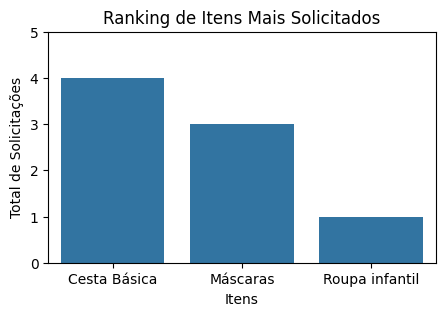

In [66]:
#----------------------------------------------
#select utilizando group by
#faz um ranking de itens mais solicitados

query = '''
  SELECT item.nome, COUNT(s.id) AS total_solicitacoes
  FROM itens item
  LEFT JOIN solicitacoes s ON s.id_item = item.id
  GROUP BY item.nome
  ORDER BY total_solicitacoes DESC;
'''
df = pd.read_sql_query (query, conn)

#criando o gráfico de colunas
plt.figure(figsize=(5, 3))
sns.barplot(x='nome', y='total_solicitacoes', data=df)
plt.title('Ranking de Itens Mais Solicitados')
plt.xlabel('Itens')
plt.ylabel('Total de Solicitações')
plt.ylim(0, df['total_solicitacoes'].max() + 1)
plt.show()

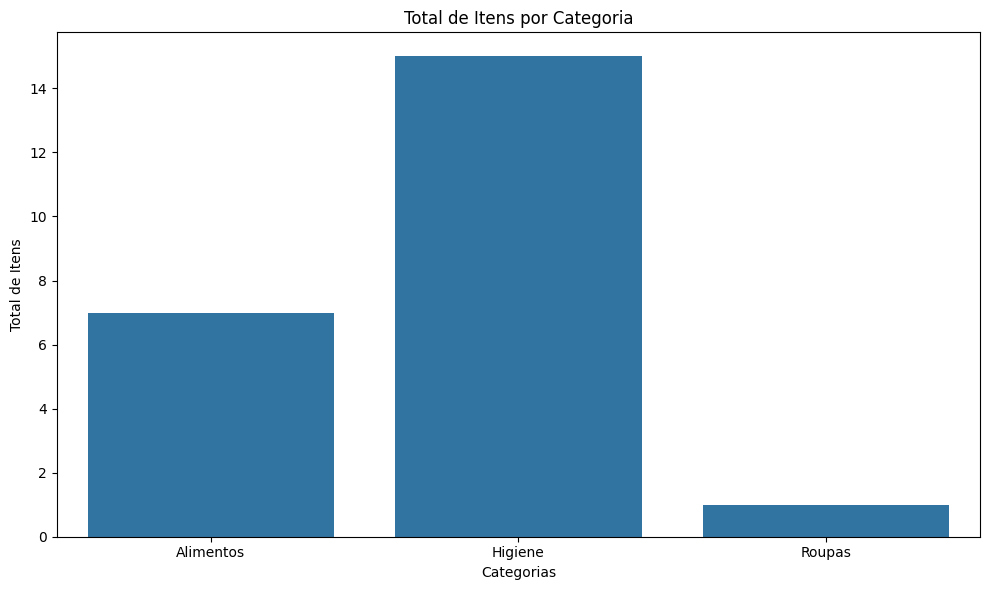

In [67]:
#-----------------------------------------------------
#select para ver o total de itens por categoria
#utilizando matplotlib e seaborn para visualização de gráfico

query = '''
  SELECT categorias.nome, SUM(itens.quantidade) AS total_itens
  FROM itens
  LEFT JOIN categorias ON categorias.id = itens.id_categoria
  GROUP BY categorias.nome
'''
df = pd.read_sql_query (query, conn)

#criando o gráfico de colunas
plt.figure(figsize=(10, 6))
sns.barplot(x='nome', y='total_itens', data=df)
plt.title('Total de Itens por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Total de Itens')
plt.tight_layout()
plt.show()

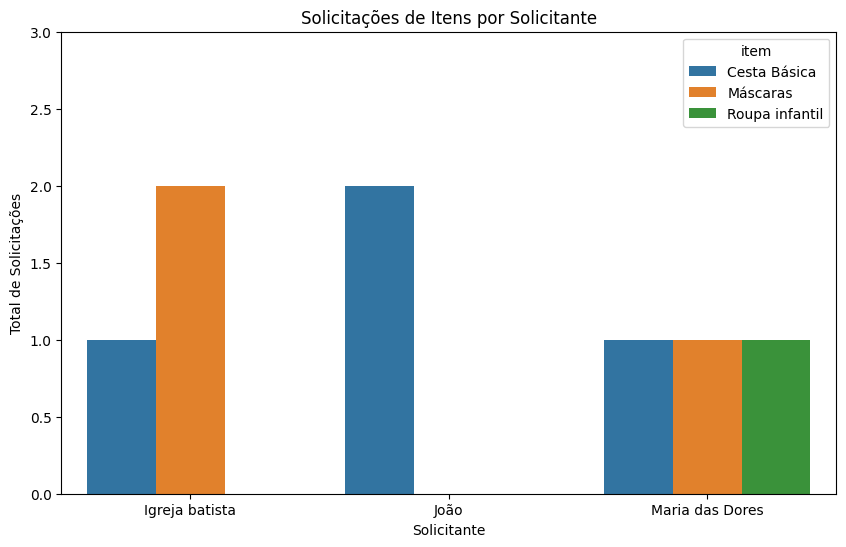

In [72]:
#-----------------------------------------------------------
#select utilizando join
#mostra quantas vezes o item foi solicitado por cada usuario

query = '''
  SELECT usuarios.nome AS solicitante, itens.nome AS item
  FROM solicitacoes
  JOIN usuarios ON solicitacoes.id_usuario = usuarios.id
  JOIN itens ON solicitacoes.id_item = itens.id;
'''
df= pd.read_sql_query(query, conn)

# Agrupar por solicitante e item, contando o número de solicitações
df_grouped = df.groupby(['solicitante', 'item']).size().reset_index(name='total_solicitacoes')

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='solicitante', y='total_solicitacoes', hue='item', data=df_grouped)
plt.title('Solicitações de Itens por Solicitante')
plt.xlabel('Solicitante')
plt.ylabel('Total de Solicitações')
plt.ylim(0, df_grouped['total_solicitacoes'].max() + 1)
plt.show()
